This project focuses on **Website Traffic Analysis** as part of my internship at internee.pk. The goal is to enhance user engagement by examining website traffic patterns and user behavior. The analysis involves several key steps: 

**Data Cleaning and Processing**, to ensure the accuracy and consistency of the data; 

**Exploratory Data Analysis (EDA)**, to uncover underlying patterns and insights; 

**User Demographics and Behavior Analysis**, to understand the characteristics and actions of the site's visitors; 

**Popular Pages Analysis**, to identify which pages attract the most attention.

Based on the findings, several strategies are recommended to improve user engagement:
1. **Streamline Navigation**: Simplify site structure for easier access to key features.
2. **Enhance Listings**: Provide detailed and engaging internship descriptions.
3. **Personalize Content**: Use data to recommend relevant internships and send tailored alerts.
4. **Interactive Tools**: Add advanced search filters and application tracking.
5. **Content Engagement**: Publish blog posts and success stories relevant to users' interests.

These strategies aim to improve user experience and increase overall engagement with internee.pk.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Website_Traffic_Data.csv')

In [5]:
df.head()

,Session_Id,Date_Key,Source_Key,Device_Key,Location_Key,Session_Duration(Seconds),Page_Views_Per_Session
0,101,4/10/2020,29,58,63,0,1
1,114,4/23/2020,76,61,73,0,1
2,120,4/29/2020,7,20,46,0,1
3,164,6/12/2020,60,44,1,0,1
4,229,8/16/2020,31,89,52,0,1


In [6]:
df.columns

Index(['Session_Id', 'Date_Key', 'Source_Key', 'Device_Key', 'Location_Key',
       'Session_Duration(Seconds)', 'Page_Views_Per_Session'],
      dtype='object')

# Data Cleaning and Processing 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Session_Id                 731 non-null    int64 
 1   Date_Key                   731 non-null    object
 2   Source_Key                 731 non-null    int64 
 3   Device_Key                 731 non-null    int64 
 4   Location_Key               731 non-null    int64 
 5   Session_Duration(Seconds)  731 non-null    int64 
 6   Page_Views_Per_Session     731 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 40.1+ KB


In [8]:
df.describe()

,Session_Id,Source_Key,Device_Key,Location_Key,Session_Duration(Seconds),Page_Views_Per_Session
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,50.317373,50.785226,52.815321,668.207934,3.450068
std,211.165812,28.478455,28.290404,28.823698,361.560454,1.588023
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,183.500000,25.000000,28.000000,29.000000,420.000000,2.000000
50%,366.000000,50.000000,51.000000,52.000000,720.000000,3.000000
75%,548.500000,75.000000,74.000000,78.000000,960.000000,5.000000
max,731.000000,100.000000,100.000000,100.000000,1200.000000,7.000000


In [9]:
# Convert Date_Key to datetime format
df['Date_Key'] = pd.to_datetime(df['Date_Key'])

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(method='ffill', inplace=True)

# Verify changes
print(df.info())

Session_Id                   0
Date_Key                     0
Source_Key                   0
Device_Key                   0
Location_Key                 0
Session_Duration(Seconds)    0
Page_Views_Per_Session       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Session_Id                 731 non-null    int64         
 1   Date_Key                   731 non-null    datetime64[ns]
 2   Source_Key                 731 non-null    int64         
 3   Device_Key                 731 non-null    int64         
 4   Location_Key               731 non-null    int64         
 5   Session_Duration(Seconds)  731 non-null    int64         
 6   Page_Views_Per_Session     731 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 40.1 KB
None


# User Demographics and User Behavior 

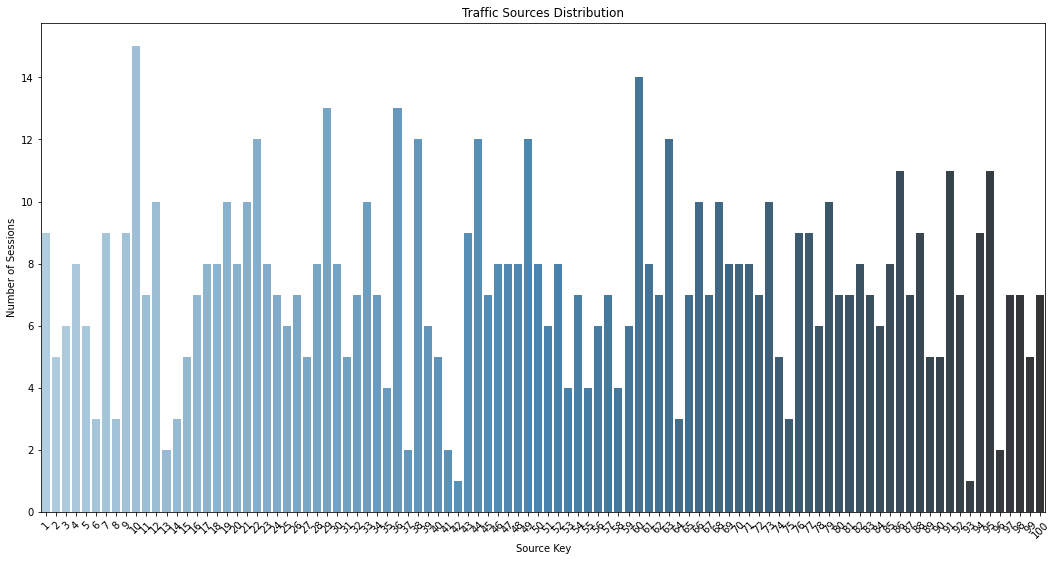

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of sessions per source
source_counts = df['Source_Key'].value_counts()

# Plot traffic sources
plt.figure(figsize=(18, 9))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='Blues_d')
plt.title('Traffic Sources Distribution')
plt.xlabel('Source Key')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

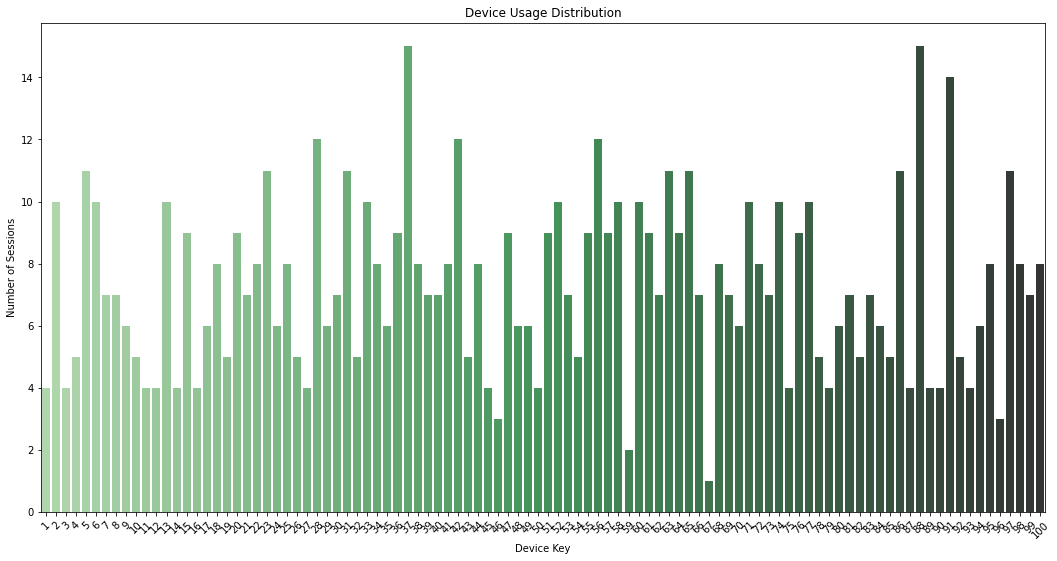

In [13]:
# Count of sessions per device
device_counts = df['Device_Key'].value_counts()

# Plot device usage
plt.figure(figsize=(18, 9))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='Greens_d')
plt.title('Device Usage Distribution')
plt.xlabel('Device Key')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

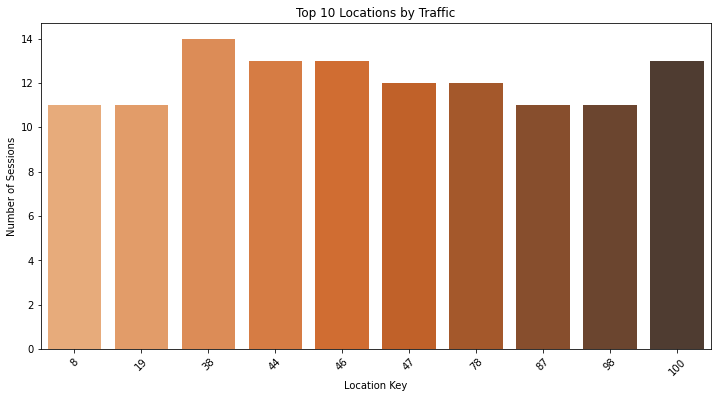

In [14]:
# Count of sessions per location
location_counts = df['Location_Key'].value_counts().head(10)

# Plot location distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Oranges_d')
plt.title('Top 10 Locations by Traffic')
plt.xlabel('Location Key')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

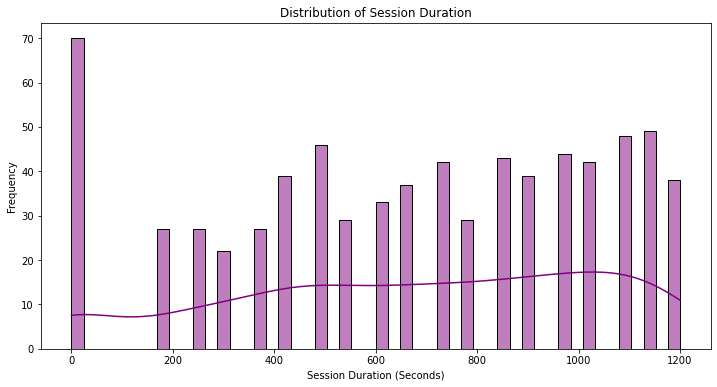

In [15]:
# Distribution of session duration
plt.figure(figsize=(12, 6))
sns.histplot(df['Session_Duration(Seconds)'], bins=50, kde=True, color='purple')
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()

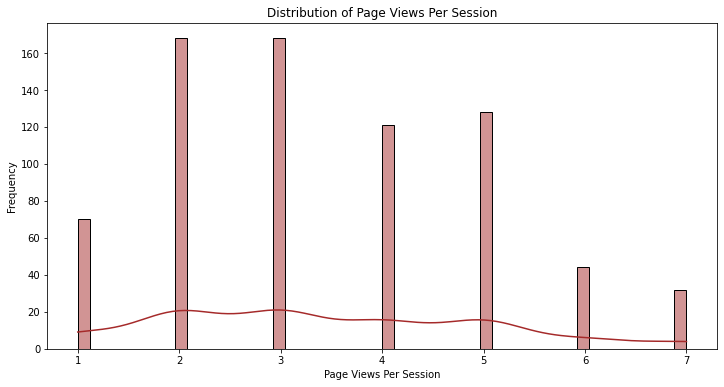

In [16]:
# Distribution of page views per session
plt.figure(figsize=(12, 6))
sns.histplot(df['Page_Views_Per_Session'], bins=50, kde=True, color='brown')
plt.title('Distribution of Page Views Per Session')
plt.xlabel('Page Views Per Session')
plt.ylabel('Frequency')
plt.show()

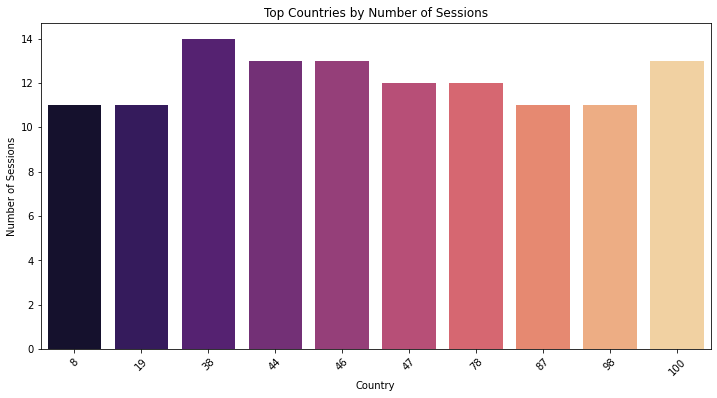

In [17]:
# Analyze top countries for traffic
top_countries = df['Location_Key'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top Countries by Number of Sessions')
plt.xlabel('Country')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()

Bounce Rate: 32.56%


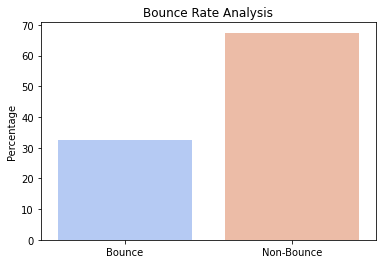

In [18]:
# Calculate bounce rate (assuming a session with less than 3 page views is a bounce)
df['Bounce'] = df['Page_Views_Per_Session'] < 3
bounce_rate = df['Bounce'].mean() * 100

print(f'Bounce Rate: {bounce_rate:.2f}%')

# Plot bounce rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Bounce', 'Non-Bounce'], y=[bounce_rate, 100-bounce_rate], palette='coolwarm')
plt.title('Bounce Rate Analysis')
plt.ylabel('Percentage')
plt.show()

# Popular Pages Analysis

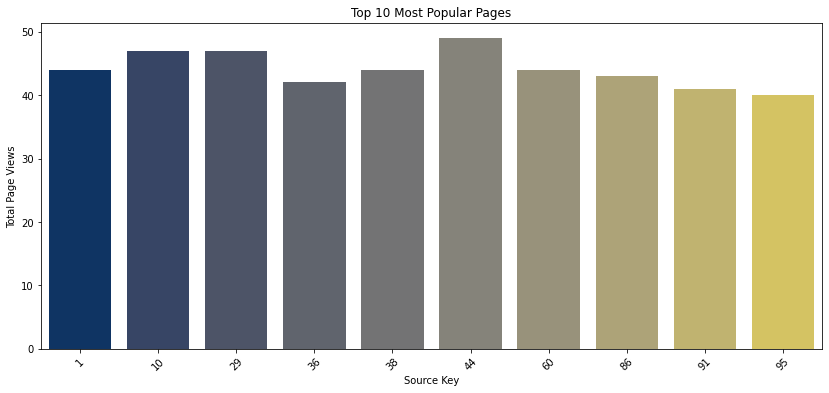

In [19]:
# Here we assume that Source_Key correlates with specific pages (e.g., each Source_Key represents a page)
popular_pages = df.groupby('Source_Key')['Page_Views_Per_Session'].sum().nlargest(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=popular_pages.index, y=popular_pages.values, palette='cividis')
plt.title('Top 10 Most Popular Pages')
plt.xlabel('Source Key')
plt.ylabel('Total Page Views')
plt.xticks(rotation=45)
plt.show()

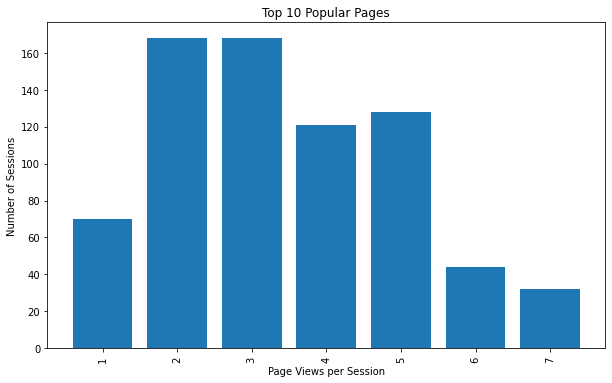

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(popular_pages['Page_Views_Per_Session'].head(10), popular_pages['Counts'].head(10))
plt.xlabel('Page Views per Session')
plt.ylabel('Number of Sessions')
plt.title('Top 10 Popular Pages')
plt.xticks(rotation=90)
plt.show()

       Session_Duration(Seconds)  Page_Views_Per_Session
count                 731.000000              731.000000
mean                  668.207934                3.450068
std                   361.560454                1.588023
min                     0.000000                1.000000
25%                   420.000000                2.000000
50%                   720.000000                3.000000
75%                   960.000000                5.000000
max                  1200.000000                7.000000


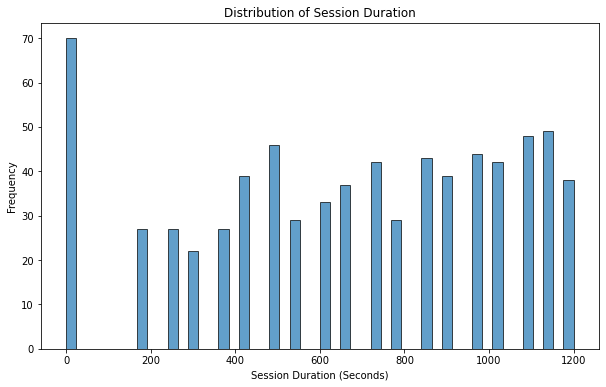

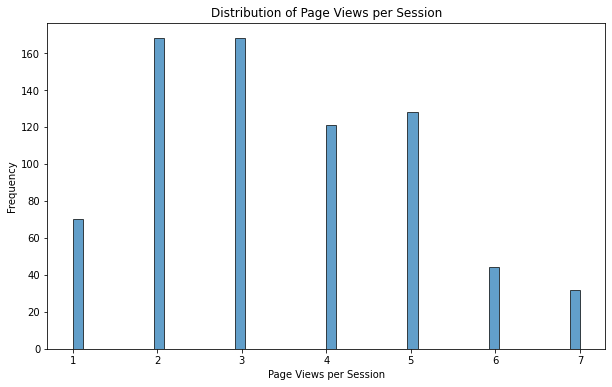

In [26]:
# Summary statistics of session duration and page views per session
behavior_summary = df[['Session_Duration(Seconds)', 'Page_Views_Per_Session']].describe()

print(behavior_summary)

# Plot session duration
plt.figure(figsize=(10, 6))
plt.hist(df['Session_Duration(Seconds)'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Duration')
plt.show()

# Plot page views per session
plt.figure(figsize=(10, 6))
plt.hist(df['Page_Views_Per_Session'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Page Views per Session')
plt.ylabel('Frequency')
plt.title('Distribution of Page Views per Session')
plt.show()

# Recommendations and Improvements 

1. **Streamline Navigation:** Simplify site layout for easy access to internship listings and user profiles.
2. **Enhance Listings:** Offer detailed and appealing internship descriptions with clear benefits.
3. **Personalize Content:** Use user data to recommend relevant internships and provide tailored job alerts.
4. **Interactive Tools:** Implement advanced search filters and application tracking features.
5. **Engage with Content:** Publish relevant blog posts, career tips, and success stories.
6. **Use Analytics:** Track user behavior to identify trends and optimize site features.
7. **Feedback Mechanism:** Collect user feedback to continually refine and improve the site.

These strategies can help boost user engagement by enhancing the overall experience on the website.